In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from PIL import Image
from IPython.display import display
import ipywidgets as widgets
import os
import io

In [14]:
#investigate 
train_features = pd.read_csv('../data/train_features.csv')
test_features = pd.read_csv('../data/test_features.csv')
train_labels = pd.read_csv('../data/train_labels.csv')
train_features

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036
...,...,...,...
16483,ZJ016483,train_features/ZJ016483.jpg,S0093
16484,ZJ016484,train_features/ZJ016484.jpg,S0043
16485,ZJ016485,train_features/ZJ016485.jpg,S0089
16486,ZJ016486,train_features/ZJ016486.jpg,S0095


In [3]:
def display_images(file_paths, num_images):
    """
    Display a specified number of images from a list of file paths.
    """
    plt.figure(figsize=(10, 10))
    for i, file_path in enumerate(file_paths[:num_images]):
        try:
            img = Image.open(f"../data/{file_path}")
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Image {i + 1}")
        except Exception as e:
            print(f"Error loading ../data/{file_path}: {e}")
    plt.tight_layout()
    plt.show()

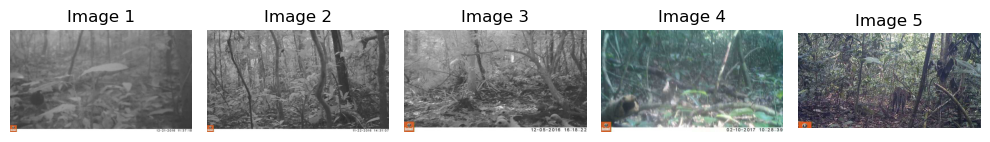

In [ ]:
display_images(train_features['filepath'].tolist(), num_images=5)

# Interactive Widget to display the Photos with Annotations

In [15]:
base_path = os.path.join('..', 'data')

df = train_features.merge(train_labels, on='id')
label_cols = train_labels.columns[1:]
df['label'] = df[label_cols].idxmax(axis=1)

def show_one(idx, width=300):
    row = df.iloc[idx]
    img_path = os.path.join(base_path, row['filepath'])
    img = Image.open(img_path)
    buf = io.BytesIO()
    img.save(buf, format='JPEG')
    img_widget = widgets.Image(
        value=buf.getvalue(),
        format='jpeg',
        width=width,
        height=width
    )
    caption = widgets.Label(f"{idx}: {row['label']} ({row['id']})")
    display(widgets.VBox([img_widget, caption]))

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df)-1,
    step=1,
    description='Image #',
    continuous_update=False,
    layout=widgets.Layout(width='80%')
)

out = widgets.interactive_output(show_one, {'idx': slider})

display(widgets.VBox([slider, out]))